# El equipo que tiene más jugadores expulsados, pierde

In [27]:
#Importamos librerías necesarias

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [28]:
#Importamos el csv
df = pd.read_csv("data/Matches.csv") 

df

C:\Users\david\AppData\Local\Temp\ipykernel_5916\127379129.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/Matches.csv")


,Division,MatchDate,MatchTime,HomeTeam,AwayTeam,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,...,MaxUnder25,HandiSize,HandiHome,HandiAway,C_LTH,C_LTA,C_VHD,C_VAD,C_HTB,C_PHB
0,F1,2000-07-28,NaN,Marseille,Troyes,1686.34,1586.57,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,F1,2000-07-28,NaN,Paris SG,Strasbourg,1714.89,1642.51,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F2,2000-07-28,NaN,Wasquehal,Nancy,1465.08,1633.80,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,F1,2000-07-29,NaN,Auxerre,Sedan,1635.58,1624.22,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F1,2000-07-29,NaN,Bordeaux,Metz,1734.34,1673.11,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230552,SP2,2025-06-01,17:30:00,Cartagena,Mirandes,1339.21,1544.15,3.0,6.0,7.0,...,2.40,1.8,1.95,1.85,0.0209,0.0118,0.0099,0.8084,0.1386,0.0104
230553,SP2,2025-06-01,17:30:00,Almeria,Tenerife,1544.16,1433.67,4.0,10.0,1.0,...,2.55,-1.8,1.80,2.00,0.3799,0.0630,0.2806,0.0160,0.2332,0.0274
230554,SP2,2025-06-01,17:30:00,La Coruna,Elche,1473.67,1569.98,0.0,3.0,3.0,...,2.63,1.3,1.78,2.03,0.0224,0.7482,0.0100,0.1201,0.0180,0.0813
230555,SP2,2025-06-01,17:30:00,Oviedo,Cadiz,1574.90,1525.76,7.0,13.0,6.0,...,1.51,-0.8,1.95,1.85,0.2070,0.2490,0.2334,0.0211,0.2634,0.0261


In [29]:
#observamos las columnas que tiene el df
df.columns

Index(['Division', 'MatchDate', 'MatchTime', 'HomeTeam', 'AwayTeam', 'HomeElo',
       'AwayElo', 'Form3Home', 'Form5Home', 'Form3Away', 'Form5Away', 'FTHome',
       'FTAway', 'FTResult', 'HTHome', 'HTAway', 'HTResult', 'HomeShots',
       'AwayShots', 'HomeTarget', 'AwayTarget', 'HomeFouls', 'AwayFouls',
       'HomeCorners', 'AwayCorners', 'HomeYellow', 'AwayYellow', 'HomeRed',
       'AwayRed', 'OddHome', 'OddDraw', 'OddAway', 'MaxHome', 'MaxDraw',
       'MaxAway', 'Over25', 'Under25', 'MaxOver25', 'MaxUnder25', 'HandiSize',
       'HandiHome', 'HandiAway', 'C_LTH', 'C_LTA', 'C_VHD', 'C_VAD', 'C_HTB',
       'C_PHB'],
      dtype='object')

In [30]:
#Eliminamos las últimas columnas que no aportan nada 
df = df.iloc[:,:-16]


In [31]:
#Eliminamos más columnas innecesarias
df = df.drop(columns=["MatchTime", "AwayElo","HomeElo","Form3Home","Form5Home","Form3Away","Form5Away"])

In [32]:
#Comprobamos que se han quedado las columnas que necesitamos
df.columns

Index(['Division', 'MatchDate', 'HomeTeam', 'AwayTeam', 'FTHome', 'FTAway',
       'FTResult', 'HTHome', 'HTAway', 'HTResult', 'HomeShots', 'AwayShots',
       'HomeTarget', 'AwayTarget', 'HomeFouls', 'AwayFouls', 'HomeCorners',
       'AwayCorners', 'HomeYellow', 'AwayYellow', 'HomeRed', 'AwayRed',
       'OddHome', 'OddDraw', 'OddAway'],
      dtype='object')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230557 entries, 0 to 230556
Data columns (total 25 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Division     230557 non-null  object 
 1   MatchDate    230557 non-null  object 
 2   HomeTeam     230557 non-null  object 
 3   AwayTeam     230557 non-null  object 
 4   FTHome       230554 non-null  float64
 5   FTAway       230554 non-null  float64
 6   FTResult     230554 non-null  object 
 7   HTHome       175977 non-null  float64
 8   HTAway       175977 non-null  float64
 9   HTResult     175977 non-null  object 
 10  HomeShots    114735 non-null  float64
 11  AwayShots    114738 non-null  float64
 12  HomeTarget   113929 non-null  float64
 13  AwayTarget   113932 non-null  float64
 14  HomeFouls    113973 non-null  float64
 15  AwayFouls    113973 non-null  float64
 16  HomeCorners  114363 non-null  float64
 17  AwayCorners  114363 non-null  float64
 18  HomeYellow   119298 non-

In [34]:
df_roja_partido = df["AwayRed"].dropna()

df_roja_partido = df["HomeRed"].dropna()

In [35]:
#Creamos la máscara de las grandes ligas( Liga española, francesa, inglesa, italiana, alemana, holandesa y portuguesa)

grandes_ligas = ["SP1","F1", "E0","I1","D1","N1","P1"]

In [36]:
#creamos el df de las grandes ligas

df_grandes_ligas = df[df["Division"].isin(grandes_ligas)]

df_grandes_ligas

,Division,MatchDate,HomeTeam,AwayTeam,FTHome,FTAway,FTResult,HTHome,HTAway,HTResult,...,AwayFouls,HomeCorners,AwayCorners,HomeYellow,AwayYellow,HomeRed,AwayRed,OddHome,OddDraw,OddAway
0,F1,2000-07-28,Marseille,Troyes,3.0,1.0,H,2.0,1.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.65,3.30,4.30
1,F1,2000-07-28,Paris SG,Strasbourg,3.0,1.0,H,1.0,1.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.60,3.40,4.60
3,F1,2000-07-29,Auxerre,Sedan,0.0,1.0,A,0.0,1.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.70,3.30,3.90
4,F1,2000-07-29,Bordeaux,Metz,1.0,1.0,D,1.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.65,3.30,4.30
5,F1,2000-07-29,Guingamp,St Etienne,2.0,2.0,D,2.0,1.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.25,3.00,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230531,I1,2025-05-25,Lazio,Lecce,0.0,1.0,A,0.0,1.0,A,...,11.0,14.0,4.0,2.0,3.0,1.0,1.0,1.56,3.72,7.09
230532,I1,2025-05-25,Torino,Roma,0.0,2.0,A,0.0,1.0,A,...,11.0,2.0,1.0,1.0,1.0,0.0,0.0,5.74,4.16,1.57
230533,I1,2025-05-25,Udinese,Fiorentina,2.0,3.0,A,1.0,0.0,H,...,6.0,2.0,8.0,3.0,2.0,1.0,0.0,3.68,3.64,1.99
230534,I1,2025-05-25,Venezia,Juventus,2.0,3.0,A,1.0,2.0,A,...,18.0,6.0,6.0,1.0,2.0,0.0,0.0,5.80,4.23,1.55


In [37]:
#creamos el df del resto de ligas

resto_ligas = df[~df["Division"].isin(grandes_ligas)]

resto_ligas

,Division,MatchDate,HomeTeam,AwayTeam,FTHome,FTAway,FTResult,HTHome,HTAway,HTResult,...,AwayFouls,HomeCorners,AwayCorners,HomeYellow,AwayYellow,HomeRed,AwayRed,OddHome,OddDraw,OddAway
2,F2,2000-07-28,Wasquehal,Nancy,0.0,1.0,A,0.0,1.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,F2,2000-07-29,Ajaccio,Le Mans,1.0,0.0,H,1.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,F2,2000-07-29,Beauvais,Montpellier,1.0,3.0,A,0.0,1.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,F2,2000-07-29,Caen,Cannes,2.0,2.0,D,1.0,2.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,F2,2000-07-29,Chateauroux,Martigues,1.0,1.0,D,0.0,1.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230552,SP2,2025-06-01,Cartagena,Mirandes,1.0,3.0,A,1.0,2.0,A,...,8.0,4.0,6.0,3.0,1.0,0.0,0.0,12.33,6.19,1.20
230553,SP2,2025-06-01,Almeria,Tenerife,2.0,0.0,H,1.0,0.0,H,...,11.0,2.0,6.0,1.0,5.0,0.0,0.0,1.22,6.23,10.97
230554,SP2,2025-06-01,La Coruna,Elche,0.0,4.0,A,0.0,3.0,A,...,18.0,2.0,0.0,2.0,2.0,0.0,0.0,5.30,4.43,1.52
230555,SP2,2025-06-01,Oviedo,Cadiz,2.0,1.0,H,2.0,1.0,H,...,8.0,8.0,3.0,0.0,1.0,0.0,0.0,1.68,3.14,6.31


In [38]:
#creamos una máscara donde devuelve los partidos donde hayan sacado al menos una tarjeta amarilla en el partido
mascara_partidos_roja_gl = (df_grandes_ligas["HomeRed"]>0)| (df_grandes_ligas["AwayRed"]>0)

df_roja_partido_gl = df_grandes_ligas[mascara_partidos_roja_gl]

df_roja_partido_gl


,Division,MatchDate,HomeTeam,AwayTeam,FTHome,FTAway,FTResult,HTHome,HTAway,HTResult,...,AwayFouls,HomeCorners,AwayCorners,HomeYellow,AwayYellow,HomeRed,AwayRed,OddHome,OddDraw,OddAway
44,D1,2000-08-12,Hamburg,Munich 1860,2.0,2.0,D,2.0,2.0,D,...,0.0,5.0,3.0,2.0,2.0,0.0,1.0,1.80,3.30,3.80
156,E0,2000-08-19,Coventry,Middlesbrough,1.0,3.0,A,1.0,1.0,D,...,21.0,8.0,4.0,5.0,3.0,1.0,0.0,2.15,3.00,3.00
161,E0,2000-08-19,Sunderland,Arsenal,1.0,0.0,H,0.0,0.0,D,...,21.0,2.0,9.0,3.0,1.0,0.0,1.0,2.85,3.25,2.10
191,D1,2000-08-19,Hertha,Hamburg,4.0,0.0,H,3.0,0.0,H,...,13.0,6.0,3.0,4.0,3.0,0.0,1.0,2.10,3.10,3.00
194,D1,2000-08-19,Wolfsburg,Kaiserslautern,4.0,0.0,H,1.0,0.0,H,...,20.0,7.0,7.0,2.0,3.0,0.0,1.0,2.25,3.00,2.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230497,SP1,2025-05-24,Getafe,Celta,1.0,2.0,A,1.0,1.0,D,...,10.0,2.0,6.0,3.0,4.0,1.0,0.0,4.22,3.65,1.86
230504,E0,2025-05-25,Liverpool,Crystal Palace,1.0,1.0,D,0.0,1.0,A,...,10.0,11.0,0.0,1.0,0.0,1.0,0.0,1.40,5.65,6.27
230505,E0,2025-05-25,Man United,Aston Villa,2.0,0.0,H,0.0,0.0,D,...,10.0,4.0,3.0,2.0,2.0,0.0,1.0,4.37,4.16,1.73
230531,I1,2025-05-25,Lazio,Lecce,0.0,1.0,A,0.0,1.0,A,...,11.0,14.0,4.0,2.0,3.0,1.0,1.0,1.56,3.72,7.09


In [39]:
#Sacamos los partidos donde el equipo local ha recibido más amarillas que el equipo visitante
mascara_local_mas_rojas_gl = df_roja_partido_gl["HomeRed"] > df_roja_partido_gl["AwayRed"]

mascara_local_mas_rojas_gl

#Sacamos los resultados donde el equipo local ha recibido más amarillas que el equipo visitante

resultados_roja_local_gl = df_roja_partido_gl[mascara_local_mas_rojas_gl].value_counts(df_roja_partido_gl["FTResult"])

resultados_roja_local_gl

FTResult
A    1615
D     892
H     731
Name: count, dtype: int64

In [40]:
#Sacamos los partidos donde el equipo local ha recibido más amarillas que el equipo visitante

mascara_visitante_mas_rojas_gl = df_roja_partido_gl["HomeRed"] < df_roja_partido_gl["AwayRed"]

mascara_visitante_mas_rojas_gl

#Sacamos los resultados donde el equipo local ha recibido más amarillas que el equipo visitante

resultados_roja_visitante_gl = df_roja_partido_gl[mascara_visitante_mas_rojas_gl].value_counts(df_roja_partido_gl["FTResult"])

resultados_roja_visitante_gl

FTResult
H    2774
D    1040
A     620
Name: count, dtype: int64

In [41]:
#Sacamos los partidos donde el equipo local ha recibido más amarillas que el equipo visitante
mascara_igual_rojas_gl = df_roja_partido_gl["HomeRed"] == df_roja_partido_gl["AwayRed"]

mascara_igual_rojas_gl

resultados_roja_igual_gl = df_roja_partido_gl[mascara_igual_rojas_gl].value_counts(df_roja_partido_gl["FTResult"])

resultados_roja_igual_gl

FTResult
H    231
A    217
D    178
Name: count, dtype: int64

In [42]:
df_rojas_final_gl = pd.DataFrame([resultados_roja_local_gl,resultados_roja_visitante_gl,resultados_roja_igual_gl])

df_rojas_final_gl

FTResult,A,D,H
count,1615,892,731
count,620,1040,2774
count,217,178,231


In [43]:
df_rojas_final_gl = df_rojas_final_gl.rename(columns={"A" : "Victoria visitante", "D":" Empate","H":"Victoria local"})

df_rojas_final_gl.index= ["Más rojas a local","Más rojas a visitante", "Igual rojas"]

df_rojas_final_gl

FTResult,Victoria visitante,Empate,Victoria local
Más rojas a local,1615,892,731
Más rojas a visitante,620,1040,2774
Igual rojas,217,178,231


In [44]:
#creamos el df del resto de ligas

df_resto_ligas = df[~df["Division"].isin(grandes_ligas)]

df_resto_ligas

,Division,MatchDate,HomeTeam,AwayTeam,FTHome,FTAway,FTResult,HTHome,HTAway,HTResult,...,AwayFouls,HomeCorners,AwayCorners,HomeYellow,AwayYellow,HomeRed,AwayRed,OddHome,OddDraw,OddAway
2,F2,2000-07-28,Wasquehal,Nancy,0.0,1.0,A,0.0,1.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,F2,2000-07-29,Ajaccio,Le Mans,1.0,0.0,H,1.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,F2,2000-07-29,Beauvais,Montpellier,1.0,3.0,A,0.0,1.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,F2,2000-07-29,Caen,Cannes,2.0,2.0,D,1.0,2.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,F2,2000-07-29,Chateauroux,Martigues,1.0,1.0,D,0.0,1.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230552,SP2,2025-06-01,Cartagena,Mirandes,1.0,3.0,A,1.0,2.0,A,...,8.0,4.0,6.0,3.0,1.0,0.0,0.0,12.33,6.19,1.20
230553,SP2,2025-06-01,Almeria,Tenerife,2.0,0.0,H,1.0,0.0,H,...,11.0,2.0,6.0,1.0,5.0,0.0,0.0,1.22,6.23,10.97
230554,SP2,2025-06-01,La Coruna,Elche,0.0,4.0,A,0.0,3.0,A,...,18.0,2.0,0.0,2.0,2.0,0.0,0.0,5.30,4.43,1.52
230555,SP2,2025-06-01,Oviedo,Cadiz,2.0,1.0,H,2.0,1.0,H,...,8.0,8.0,3.0,0.0,1.0,0.0,0.0,1.68,3.14,6.31


In [45]:
#creamos una máscara donde devuelve los partidos donde hayan sacado al menos una tarjeta amarilla en el partido
mascara_partidos_roja_rl = (df_resto_ligas["HomeRed"]>0)| (df_resto_ligas["AwayRed"]>0)

df_roja_partido_rl = df_resto_ligas[mascara_partidos_roja_rl]

df_roja_partido_rl

,Division,MatchDate,HomeTeam,AwayTeam,FTHome,FTAway,FTResult,HTHome,HTAway,HTResult,...,AwayFouls,HomeCorners,AwayCorners,HomeYellow,AwayYellow,HomeRed,AwayRed,OddHome,OddDraw,OddAway
68,E2,2000-08-12,Swansea,Wigan,0.0,0.0,D,0.0,0.0,D,...,14.0,4.0,1.0,1.0,2.0,0.0,1.0,NaN,NaN,NaN
71,E1,2000-08-12,Barnsley,Norwich,1.0,0.0,H,0.0,0.0,D,...,13.0,1.0,3.0,1.0,0.0,1.0,0.0,NaN,NaN,NaN
81,E1,2000-08-12,Wimbledon,Tranmere,0.0,0.0,D,0.0,0.0,D,...,17.0,8.0,3.0,1.0,3.0,0.0,1.0,NaN,NaN,NaN
109,E1,2000-08-13,Wolves,Sheffield Weds,1.0,1.0,D,1.0,0.0,H,...,14.0,11.0,3.0,1.0,5.0,0.0,1.0,NaN,NaN,NaN
116,D2,2000-08-14,Duisburg,Ulm,1.0,2.0,A,0.0,1.0,A,...,26.0,10.0,3.0,3.0,1.0,0.0,1.0,2.00,3.00,3.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230512,T1,2025-05-25,Konyaspor,Alanyaspor,1.0,2.0,A,0.0,2.0,A,...,12.0,6.0,2.0,4.0,5.0,1.0,0.0,2.97,3.26,2.37
230514,T1,2025-05-25,Buyuksehyr,Ad. Demirspor,2.0,3.0,A,2.0,1.0,H,...,11.0,10.0,0.0,3.0,4.0,0.0,1.0,1.07,11.64,23.21
230519,SP2,2025-05-25,Granada,Castellon,2.0,1.0,H,1.0,0.0,H,...,11.0,11.0,2.0,3.0,1.0,0.0,1.0,1.53,4.48,5.10
230536,T1,2025-05-26,Hatayspor,Fenerbahce,4.0,2.0,H,1.0,1.0,D,...,11.0,2.0,8.0,1.0,2.0,0.0,1.0,9.98,6.92,1.21


In [46]:
#Sacamos los partidos donde el equipo local ha recibido más amarillas que el equipo visitante
mascara_local_mas_rojas_rl = df_roja_partido_rl["HomeRed"] > df_roja_partido_rl["AwayRed"]

mascara_local_mas_rojas_rl

#Sacamos los resultados donde el equipo local ha recibido más amarillas que el equipo visitante

resultados_roja_local_rl = df_roja_partido_rl[mascara_local_mas_rojas_rl].value_counts(df_roja_partido_rl["FTResult"])

resultados_roja_local_rl

FTResult
A    2448
D    1347
H    1148
Name: count, dtype: int64

In [47]:
#Sacamos los partidos donde el equipo local ha recibido más amarillas que el equipo visitante

mascara_visitante_mas_rojas_rl = df_roja_partido_rl["HomeRed"] < df_roja_partido_rl["AwayRed"]

mascara_visitante_mas_rojas_rl

#Sacamos los resultados donde el equipo local ha recibido más amarillas que el equipo visitante

resultados_roja_visitante_rl = df_roja_partido_rl[mascara_visitante_mas_rojas_rl].value_counts(df_roja_partido_rl["FTResult"])

resultados_roja_visitante_rl

FTResult
H    4331
D    1674
A    1053
Name: count, dtype: int64

In [48]:
#Sacamos los partidos donde el equipo local ha recibido más amarillas que el equipo visitante
mascara_igual_rojas_rl = df_roja_partido_rl["HomeRed"] == df_roja_partido_rl["AwayRed"]

mascara_igual_rojas_rl

resultados_roja_igual_rl = df_roja_partido_rl[mascara_igual_rojas_rl].value_counts(df_roja_partido_rl["FTResult"])

resultados_roja_igual_rl

FTResult
H    315
D    255
A    228
Name: count, dtype: int64

In [49]:
df_rojas_final_rl = pd.DataFrame([resultados_roja_local_rl,resultados_roja_visitante_rl,resultados_roja_igual_rl])

df_rojas_final_rl

FTResult,A,D,H
count,2448,1347,1148
count,1053,1674,4331
count,228,255,315


In [50]:
df_rojas_final_rl = df_rojas_final_rl.rename(columns={"A" : "Victoria visitante", "D":" Empate","H":"Victoria local"})

df_rojas_final_rl.index= ["Más rojas a local","Más rojas a visitante", "Igual rojas"]

df_rojas_final_rl

FTResult,Victoria visitante,Empate,Victoria local
Más rojas a local,2448,1347,1148
Más rojas a visitante,1053,1674,4331
Igual rojas,228,255,315


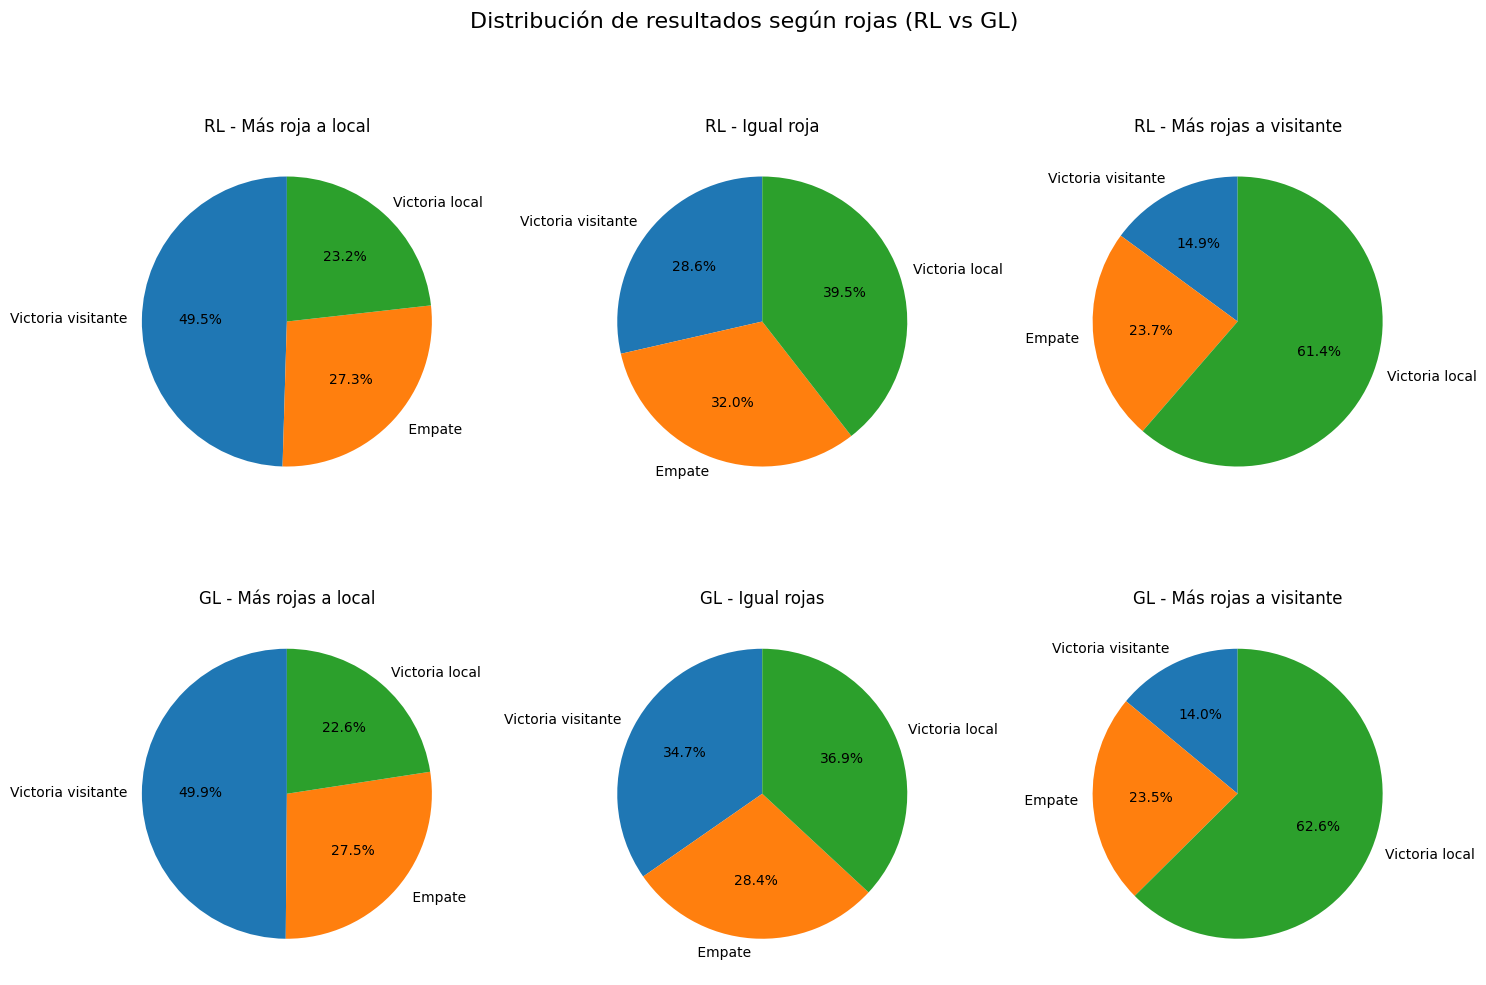

In [51]:
# --- Datos RL ---
labels_rl = df_rojas_final_rl.columns
roja_local_rl = df_rojas_final_rl.loc["Más rojas a local"]
roja_visitante_rl = df_rojas_final_rl.loc["Más rojas a visitante"]
roja_igual_rl = df_rojas_final_rl.loc["Igual rojas"]

total_roja_local_rl = sum(roja_local_rl)
total_roja_visitante_rl = sum(roja_visitante_rl)
total_roja_igual_rl = sum(roja_igual_rl)

porcentaje_local_rl = [x / total_roja_local_rl * 100 for x in roja_local_rl]
porcentaje_visitante_rl = [x / total_roja_visitante_rl * 100 for x in roja_visitante_rl]
porcentaje_igual_rl = [x / total_roja_igual_rl * 100 for x in roja_igual_rl]

# --- Datos GL ---
labels_gl = df_rojas_final_gl.columns
roja_local_gl = df_rojas_final_gl.loc["Más rojas a local"]
roja_visitante_gl = df_rojas_final_gl.loc["Más rojas a visitante"]
roja_igual_gl = df_rojas_final_gl.loc["Igual rojas"]

total_roja_local_gl = sum(roja_local_gl)
total_roja_visitante_gl = sum(roja_visitante_gl)
total_roja_igual_gl = sum(roja_igual_gl)

porcentaje_local_gl = [x / total_roja_local_gl * 100 for x in roja_local_gl]
porcentaje_visitante_gl = [x / total_roja_visitante_gl * 100 for x in roja_visitante_gl]
porcentaje_igual_gl = [x / total_roja_igual_gl * 100 for x in roja_igual_gl]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Fila 1: RL
axes[0, 0].pie(porcentaje_local_rl, labels=labels_rl, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('RL - Más roja a local')

axes[0, 2].pie(porcentaje_visitante_rl, labels=labels_rl, autopct='%1.1f%%', startangle=90)
axes[0, 2].set_title('RL - Más rojas a visitante')

axes[0, 1].pie(porcentaje_igual_rl, labels=labels_rl, autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title("RL - Igual roja")

# Fila 2: GL
axes[1, 0].pie(porcentaje_local_gl, labels=labels_gl, autopct='%1.1f%%', startangle=90)
axes[1, 0].set_title('GL - Más rojas a local')

axes[1, 2].pie(porcentaje_visitante_gl, labels=labels_gl, autopct='%1.1f%%', startangle=90)
axes[1, 2].set_title('GL - Más rojas a visitante')

axes[1, 1].pie(porcentaje_igual_gl, labels=labels_gl, autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('GL - Igual rojas')

# --- Ajustes generales ---
plt.suptitle('Distribución de resultados según rojas (RL vs GL)', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()